Homework 3 : Yeqi Chen
===

Phase Portraits, expoententials, and solutions

**<span style="color: darkgreen">Due Sunday April 21 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Nise Chapters 3 and 4. Note, we haven't covered everything yet in these chapters yet, but we will and it would be good for you to read them.

In [2]:
#Import cell 
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
from sympy import *

%matplotlib inline

1. Phase Portraits and Linearization
---

For each of the
following systems, (i) find the equilibria, (ii) linearize the system
around each equilibrium and find the eigenvalues and eigenvectors, (iii)
state whether the system is stable at each equilibrium, (iv) draw a phase
portrait by first drawing the phase portrait near the equilibria and
then interpolating. Compare your drawing to a phase portrait of the entire system generated with Python.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

## a)

for a) we can test specific value such as $x_1 = 0 and x_2 = 0$, which gives us result $\left(
\begin{array}{cc}
  0  \\
  0 
\end{array}
\right)$, as equilibrium point. 


Linearizing the system around $X_1 = 0$ and $X_2 = 0$: 

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{cc}
  \frac{\partial x_2^2}{\partial x_1} & 
  \frac{\partial x_2^2}{\partial x_2} \\
  \frac{\partial x_1^2}{\partial x_1} &
  \frac{\partial x_1^2}{\partial x_2} 
\end{array}
\right )\right|_{x_1=0,x_2=0}
=
\left.\left(
\begin{array}{cc}
  0 & 2x_2 \\
  2x_1 & 0
\end{array}
\right )\right|_{x_1=0,x_2=0}
=
\left(
\begin{array}{cc}
  0 & 0 \\
  0 & 0
\end{array}
\right)
$$

So, near $0$ the system looks like

$$
\left (
\begin{array}{c} 
\dot X_1\\ 
\dot X_2
\end{array} \right )
\approx
\left(
\begin{array}{cc}
  0 & 0 \\
  0 & 0
\end{array}
\right)
\left (
\begin{array}{c} 
X_1 \\ 
X_2
\end{array} \right )
=
\left (
\begin{array}{c} 
0 \\ 
0
\end{array} \right )
$$

Then solve for the eigenvalue: 
$\lambda = 0$ for $\left( \begin{array}{cc} 0&0\\0&0 \end{array}\right)$
so eigenvector is equal to $\left( \begin{array}{cc} 0\\0 \end{array}\right)$.

C:\Users\Villy\Anaconda3\lib\site-packages\matplotlib\quiver.py:666: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Villy\Anaconda3\lib\site-packages\matplotlib\quiver.py:666: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\Villy\Anaconda3\lib\site-packages\matplotlib\quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
C:\Users\Villy\Anaconda3\lib\site-packages\matplotlib\quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


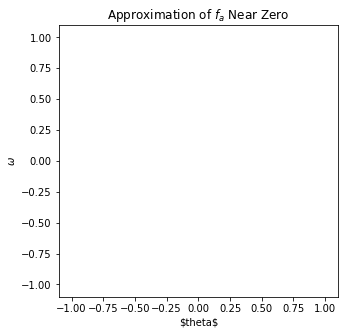

In [22]:
theta = np.linspace(-1, 1, 9)
omega = np.linspace(-1, 1, 9)
Theta,Omega = np.meshgrid(theta,omega)
u = 0
v = 0
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('\\$theta$')
plt.ylabel('$\omega$')
plt.title("Approximation of $f_a$ Near Zero");

Since u,v = 0, there supposed to be some dots indicating zero vectors; but it doesn't show up, we cannot tell the stablilty at zero point.

as we can see, the equilibrium point is around $x_1 = x_2 =0$; and the stability is semi-stable.


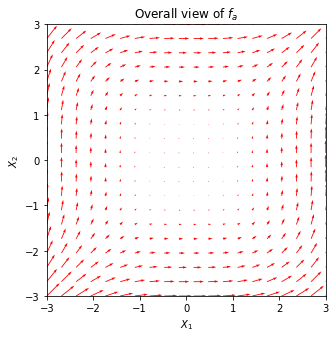

In [16]:
#defin a
def f_a(x,t):
    x1,x2 = x;
    return [x2**2, x1**2]

x_1 = np.linspace(-3,3, 20)
x_2 = np.linspace(-3,3, 20)
X_1,X_2 = np.meshgrid(x_1,x_2)
u,v = np.zeros(X_1.shape),np.zeros(X_2.shape)
n,m = X_1.shape
for i in range (n):
        for j in range(m):
            xdot = f_a([X_1[i,j],X_2[i,j]],0)
            u[i,j] = xdot[0]
            v[i,j] = xdot[1]
            
            
plt.rcParams['figure.figsize'] = [5,5]
Q = plt.quiver(X_1, X_2, u, v, color = 'r')
plt.title('Overall view of $f_a$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim(-3,3)
plt.ylim(-3,3)



as we can see, the equilibrium point is around $x_1 = x_2 =0$; and the stability is semi-stable.

## b) 

for a) we can test specific value such as $x_1 = 0$  and  $x_2 = 0$, which gives us result $\left(
\begin{array}{cc}
  0  \\
  0 
\end{array}
\right)$, as equilibrium point. 

Linearizing the system around $X_1 = 0$ and $X_2 = 0$: 

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{cc}
  \frac{\partial x_1^2+ x_2^2}{\partial x_1} & 
  \frac{\partial x_1^2 +x_2^2}{\partial x_2} \\
  \frac{\partial x_2}{\partial x_1} &
  \frac{\partial x_2}{\partial x_2} 
\end{array}
\right )\right|_{x_1=0,x_2=0}
=
\left.\left(
\begin{array}{cc}
  2x_1 & 2x_2 \\
  2x_1 & 1
\end{array}
\right )\right|_{x_1=0,x_2=0}
=
\left(
\begin{array}{cc}
  0 & 0 \\
  0 & 1
\end{array}
\right)
$$

So, near $(0,0)$ the system looks like

$$
\left (
\begin{array}{c} 
\dot X_1\\ 
\dot X_2
\end{array} \right )
\approx
\left(
\begin{array}{cc}
  0 & 0 \\
  0 & 1
\end{array}
\right)
\left (
\begin{array}{c} 
X_1 \\ 
X_2
\end{array} \right )
=
\left (
\begin{array}{c} 
0 \\ 
X_2
\end{array} \right )
$$

Then solve for the eigenvalue: 
$\lambda = 0 , 1$ for $\left( \begin{array}{cc} 0&0\\0&1 \end{array}\right)$., then 
the eigenvectors are $\left( \begin{array}{cc} 1\\0 \end {array}\right)$ and $\left( \begin{array}{cc} 0\\1 \end {array}\right)$

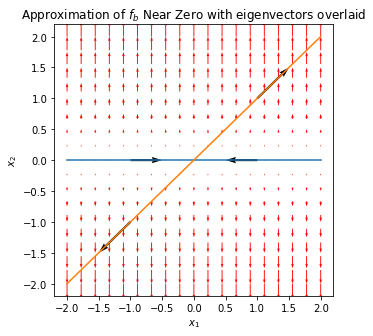

In [50]:
q=np.linspace(-2,2,10)
a= 0
b= 1
theta = np.linspace(-2, 2, 19)
omega = np.linspace(-2, 2, 19)
Theta,Omega = np.meshgrid(theta,omega)
u = 0
v = Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')

plt.plot(q,a*q)
plt.plot(q,b*q)
plt.quiver([1,-1,1,-1],[a,-a,b,-b],[-1,1,1,-1],[-a,a,b,-b],
           scale=2,angles='xy',scale_units='xy');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Approximation of $f_b$ Near Zero with eigenvectors overlaid");

From the graph we can say that $f_b$ near (0,0) is semi-stable. 

(-3, 3)

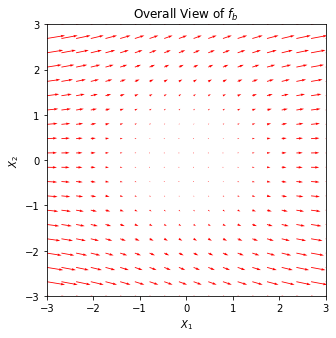

In [18]:
#define B
def f_b(x,t):
    x3,x4 = x
    return [x3**2+x4**2,x4]

x_3 = np.linspace(-3,3, 20)
x_4 = np.linspace(-3,3, 20)
X_3,X_4 = np.meshgrid(x_3,x_4)
u2,v2 = np.zeros(X_3.shape),np.zeros(X_4.shape)
n,m = X_3.shape
for i in range (n):
        for j in range(m):
            xdot = f_b([X_3[i,j],X_4[i,j]],0)
            u2[i,j] = xdot[0]
            v2[i,j] = xdot[1]
            
            
plt.rcParams['figure.figsize'] = [5,5]
Q = plt.quiver(X_3, X_4, u2, v2, color = 'r')
plt.title('Overall View of $f_b$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim(-3,3)
plt.ylim(-3,3)



as we can see, the equilibrium is around $x_1 = x_2 = 0$, which satisfies our calculation; however, the difference between the overall view and the approximation is that the approximation gets that the vector equal to $x_2$ so all the arrows points either straight up or down; but the overall view has component of $x_1$ in each vector. but the stablilty doesn't change-- it's still semi-stable. 

## c) 
to find the equilibrium, we can slove for $sin(x_2) = 0$ and $cos(x_1) = 0$, which gives us result $x_1 = a \pi+ \frac{\pi}{2}$ and $x_2 = b \pi$ where $ a,b = integer$. 

Picking one results near origin $x_1 = \frac {\pi}{2}$ and $x_2 = 0$ by using change of coordinate:

define $x_{1e} = x_2 -x^*$ and  $x_{2e} = x_2 -x^*$ where $x^*$ is the equilibrium point.

$$
f \left (
\begin{array}{c} 
x_1e + \frac{\pi}{2} \\ 
x_2e + 0
\end{array} \right ) = 
\left (
\begin{array}{c} 
sinx_2e \\ 
cos(x_{1e} + \frac{\pi}{2})
\end{array} \right )
$$

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{cc}
  \frac{\partial sin(x_{2e})}{\partial x_{1e}} & 
  \frac{\partial sin(x_{2e})}{\partial x_{2e}} \\
  \frac{\partial cos(x_{1e} + \frac{\pi}{2})}{\partial x_{1e}} &
  \frac{\partial cos(x_{1e} + \frac{\pi}{2})}{\partial x_{2e}} 
\end{array}
\right )\right|_{x_{1e}=0,x_{2e}=0}
=
\left.\left(
\begin{array}{cc}
  0 & cosx_{2e} \\
  -sin(x_{1e}+ \frac{\pi}{2} )& 0
\end{array}
\right )\right|_{x_{1e}=0,x_{2e}=0}
=
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & 0
\end{array}
\right)
$$

So, near $(0,0)$ of the new system looks like

$$
\left (
\begin{array}{c} 
\dot X_1\\ 
\dot X_2
\end{array} \right )
\approx
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & 0
\end{array}
\right)
\left (
\begin{array}{c} 
X_1 \\ 
X_2
\end{array} \right )
=
\left (
\begin{array}{c} 
x_2 \\ 
-x_1
\end{array} \right )
$$

Then solve for the eigenvalue: 
$\lambda = i , -i$ for $\left( \begin{array}{cc} 0&1\\-1&0 \end{array}\right)$.
the eigenvectors are $\left( \begin{array}{cc} -i\\1 \end {array}\right)$ and $\left( \begin{array}{cc} i\\1 \end {array}\right)$

In this case, we cannot draw the imaginary part of the eigenvector. 

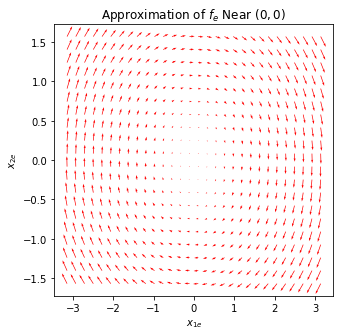

In [87]:

theta = np.linspace(-np.pi, np.pi, 30)
omega = np.linspace(-1/2*np.pi, 1/2*np.pi, 20)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = -Theta
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')


plt.xlabel('$x_{1e}$')
plt.ylabel('$x_{2e}$')
plt.title('Approximation of $f_e$ Near $(0,0)$');


As we can see, at this point $f_c$ is marginally stable. 

(-3.141592653589793, 3.141592653589793)

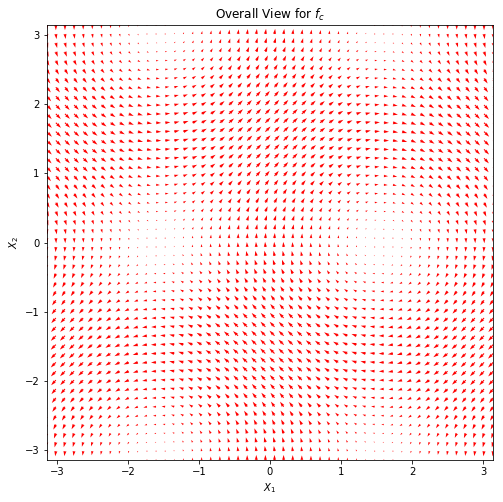

In [21]:
def f_c(x,t):
    x5,x6  = x 
    return [np.sin(x6),np.cos(x5)]

x_5 = np.linspace(-np.pi,np.pi, 50)
x_6 = np.linspace(-np.pi,np.pi, 50)
X_5,X_6 = np.meshgrid(x_5,x_6)
u3,v3 = np.zeros(X_5.shape),np.zeros(X_6.shape)
n,m = X_5.shape
for i in range (n):
        for j in range(m):
            xdot = f_c([X_5[i,j],X_6[i,j]],0)
            u3[i,j] = xdot[0]
            v3[i,j] = xdot[1]
            
            
plt.rcParams['figure.figsize'] = [8,8]
Q = plt.quiver(X_5, X_6, u3, v3, color = 'r')
plt.title('Overall View for $f_c$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)

from the overall view, we can see that the there is no equilibrium point at (0,0) while the approximation shows one; and also, we can say there are two kinds of equilibrium points, that $(a \pi + \frac{\pi}{2}, b*2\pi)$ and $(a\pi - \frac{\pi}{2}, b*2\pi + \pi)$ points are stable equilibrium points, while $(a\pi - \frac{\pi}{2}, b*2\pi)$ and $(a \pi + \frac{\pi}{2}, b*2\pi + \pi)$ are unstable equilibrium points. 

2. Nonlinear Systems
---

a) find a single nonlinear systems that has exactly four distinct equilibria, each of which has a different eigenvalue structure (i.e. a different type in the taxonomy). 

b) Find a nonlinear system that has the following phase portrait. Hint: Try polar coordinates. Plot the phase portait in Python.

<img src="https://raw.githubusercontent.com/klavins/ECE447/master/images/limit-cycle.png" width=30%>

## a) 


## b) 

for the following portrait, we can decomposite it into three parts: a circular pattern, a influxing pattern and the wave-shape pattern. each of the pattern corresponds to one kind of eigenvalue: $ \lambda_1 = \lambda_2 > 0$, $\lambda_1,\lambda_2 = \pm ai$, $\lambda_1, \lambda_2 = p \pm ai, p < 0$.


Jordan Form
---

Use `sympy` to find the Jordan form for each matrix below. Describe what the Jordan blocks are in each case. Show that in each case $A = PJP^{-1}$ and that $e^{At} = Pe^{Jt}P^{-1}$. 

$$
A = \begin{pmatrix}
1 & -3 & 3 & 0 \\
-2 & 1 & 2 & 0 \\
-2 & -3 & 6 & 0 \\
-1 & -1 & 1 & 2
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
0 & 0 & 0 & 1 \\
-2 & 2 & 0 & 1 \\
-2 & -1 & 3 & 1 \\
-1 & 0 & 0 & 2
\end{pmatrix}
$$

$$
A = \begin{pmatrix}
0 & -3 & 1 & 1 \\
1 & -3 & 0 & 1 \\
1 & -2 & -1 & 1 \\
2 & -1 & -2 & 0
\end{pmatrix}
$$

In [162]:
A = Matrix( [
    [1,-3,3,0],
    [-2,1,2,0],
    [-2,-3,6,0],
    [-1,-1,1,2],
])
B = Matrix( [
    [0,0,0,1],
    [-2,2,0,1],
    [-2,-1,3,1],
    [-1,0,0,2],
])
C = Matrix( [
    [0,-3,1,1],
    [1,-3,0,1],
    [1,-2,-1,1],
    [2,-1,-2,0],
])
X,J = A.jordan_form() 
Y,K = B.jordan_form()
Z,L = C.jordan_form()

In [127]:
J


Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 3, 0],
[0, 0, 0, 4]])

where $$
J = \begin{pmatrix}
J_1(1) & 0 & 0& 0\\
0 & J_1(2) & 0&0 \\
0&  0 & J_1(3)&0\\
0&0&0&J_1(4)
\end{pmatrix}
$$

In [128]:
print(X)
print(X*J*X.inv())

Matrix([[1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0]])
Matrix([[1, -3, 3, 0], [-2, 1, 2, 0], [-2, -3, 6, 0], [-1, -1, 1, 2]])


SO $XJX^{-1} = A$

In [4]:
var("t")
exp(J*t)

NameError: name 'J' is not defined

In [130]:
X*exp(J*t)*X.inv()

Matrix([
[            exp(t), -exp(4*t) + exp(t),            exp(4*t) - exp(t),        0],
[-exp(3*t) + exp(t),             exp(t),            exp(3*t) - exp(t),        0],
[-exp(3*t) + exp(t), -exp(4*t) + exp(t), exp(4*t) + exp(3*t) - exp(t),        0],
[-exp(2*t) + exp(t), -exp(2*t) + exp(t),            exp(2*t) - exp(t), exp(2*t)]])

In [132]:
exp(A*t) == X*exp(J*t)*X.inv()

True

In [103]:
K

Matrix([
[1, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 3]])

where $$
K = \begin{pmatrix}
J_2(1) & 0 & 0\\
0 & J_1(2) & 0 \\
0&  0 & J_1(3)
\end{pmatrix}
$$

In [112]:
print(Y)
print(Y*K*Y.inv())

Matrix([[-1, 1, 0, 0], [-1, 1, 1, 0], [-1, 1, 1, 1], [-1, 0, 0, 0]])
Matrix([[0, 0, 0, 1], [-2, 2, 0, 1], [-2, -1, 3, 1], [-1, 0, 0, 2]])


So $YKY^{-1} = B$

In [133]:
exp(K*t)

Matrix([
[exp(t), t*exp(t),        0,        0],
[     0,   exp(t),        0,        0],
[     0,        0, exp(2*t),        0],
[     0,        0,        0, exp(3*t)]])

In [134]:
Y*exp(K*t)*Y.inv()

Matrix([
[           -t*exp(t) + exp(t),                    0,        0,          t*exp(t)],
[-t*exp(t) - exp(2*t) + exp(t),             exp(2*t),        0,          t*exp(t)],
[-t*exp(t) - exp(2*t) + exp(t), -exp(3*t) + exp(2*t), exp(3*t),          t*exp(t)],
[                    -t*exp(t),                    0,        0, t*exp(t) + exp(t)]])

In [136]:
exp(B*t) == Y*exp(K*t)*Y.inv()

True

In [163]:
S

Matrix([
[-1,  1,  0,  0],
[ 0, -1,  1,  0],
[ 0,  0, -1,  1],
[ 0,  0,  0, -1]])

where L = $J_4(-1)$

In [177]:
print(Z)
print(Z*L*Z.inv())
C == Z*L*Z.inv()

Matrix([[-1, 0, -3, 0], [-1, 0, -2, 1], [-1, 0, -2, 0], [-1, -1, -1, 0]])
Matrix([[0, -3, 1, 1], [1, -3, 0, 1], [1, -2, -1, 1], [2, -1, -2, 0]])


True

so $ZLZ^{-1} = C$

In [181]:
exp(L*t)

Matrix([
[exp(-t), t*exp(-t), t**2*exp(-t)/2, t**3*exp(-t)/6],
[      0,   exp(-t),      t*exp(-t), t**2*exp(-t)/2],
[      0,         0,        exp(-t),      t*exp(-t)],
[      0,         0,              0,        exp(-t)]])

There is some problem in this code, since the former code doesn't have any bug but this one cannot give correct answer for exp(L*t), as we can see on the top-right corner, which should be 0. 

In [172]:
Z*exp(L*t)*Z.inv()

Matrix([
[t**2*exp(-t)/2 + t*exp(-t) + exp(-t),                -t**3*exp(-t)/6 - 3*t*exp(-t), t**3*exp(-t)/6 - t**2*exp(-t)/2 + t*exp(-t),           t*exp(-t)],
[          t**2*exp(-t)/2 + t*exp(-t),      -t**3*exp(-t)/6 - 2*t*exp(-t) + exp(-t),             t**3*exp(-t)/6 - t**2*exp(-t)/2,           t*exp(-t)],
[          t**2*exp(-t)/2 + t*exp(-t),                -t**3*exp(-t)/6 - 2*t*exp(-t),   t**3*exp(-t)/6 - t**2*exp(-t)/2 + exp(-t),           t*exp(-t)],
[        t**2*exp(-t)/2 + 2*t*exp(-t), -t**3*exp(-t)/6 - t**2*exp(-t)/2 - t*exp(-t),                t**3*exp(-t)/6 - 2*t*exp(-t), t*exp(-t) + exp(-t)]])

In [182]:
exp(C*t) == Z*exp(L*t)*Z.inv()

False

4. Matrix Exponential Properties
---

Recall that for matrices $A$ and $B$ that it is not necessarily the case that $AB = BA$ (i.e. that $A$ and $B$ commute). Show that 
- (a) If $AB=BA$ then $e^Ae^B = e^Be^A$ using the definition of the matrix exponential as a series.
- (b) Find an example of where $A$ and $B$ do not commute and show that $e^Ae^B \neq e^Be^A$.

# a) 
let A,B be a n*n matrix; then assume $A = PJ_AP^{-1}$, $B = QJ_BQ^{-1}$, for the $J_A$ we have: 

$$
e^{J_A} = \begin{pmatrix}
e^a & e & ...&... \\
 0 & e^a& ...&...\\
  ...&   & e^a \\
          ...&...
\end{pmatrix} .
$$

$$
e^{J_B} = \begin{pmatrix}
e^b & e & ...&... \\
 0 & e^b& ...&...\\
  ...&   & e^b \\
          ...&...
\end{pmatrix} .
$$
thus, $e^A * e^B $ gives: 
$$
e^Ae^B = \begin{pmatrix}
e^Ae^B & 0 & ...&... \\
 0 & e^Ae^B& ...&...\\
  ...&   & e^Ae^B \\
  ...&...
\end{pmatrix}
$$, and 
which is equal to 

thus, $e^A * e^B$ gives: 
$$
e^{A+B} = \begin{pmatrix}
e^{A+B} & 0 & ...&... \\
 0 & e^{A+B}& ...&...\\
  ...&   & e^{A+B} \\
  ...&...
\end{pmatrix}
$$,
$$
 = \begin{pmatrix}
e^Be^A & 0 & ...&... \\
 0 & e^Be^A& ...&...\\
  ...&   & e^Be^A \\
  ...&...
\end{pmatrix}
 = e^Be^A. 
 $$

In [ ]:
## b) for example, 
D = Matrix([
[1, 1, 0, 1],
[0, 1, 30, 2],
[0, 3, 2, 0],
[4, 6, 0, 3]])
E = Matrix( [
    [0,0,0,1],
    [-2,2,0,1],
    [-2,-1,3,1],
    [-1,0,0,2]])
#THEY ARE NOT commute, so 
exp(D*t)


5. Tuning Eigenvalues
---

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k+1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. For what values of $k$ is the system stable? Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

Hint: Do this in `sympy`. Use `lambdify` to convert the eigenvalue real parts to functions so you can plot them. 

Solve the eigenvalue of A: $(\lambda-k)(\lambda-k-1)+k = 0$ so 
$ k = \frac{2k+1\pm \sqrt{-4k+1}}{2}$. so the real part of the eigenvalue would be $\frac{2a+1}{2}

In [6]:
def egvl(k): 
    return (2*k +1)/2  

Text(0,0.5,'eigenvalue')

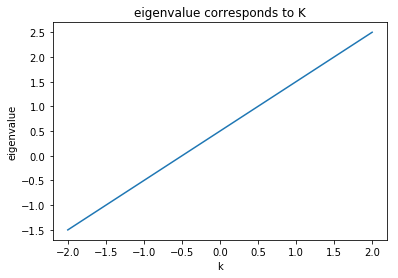

In [9]:
k = np.linspace(-2,2, 20)

plt.plot(k,egvl(k))
plt.title('eigenvalue corresponds to K')
plt.xlabel('k')
plt.ylabel('eigenvalue')